In [117]:
import numpy as np
import matplotlib.pyplot as plt

## Binominal in python

假設，有 3(n=3) 枚公平硬幣，正反面出現的機率都是 0.5(p=0.1)，丟 1 次，出現 2 個正面的機率?

以代公式來說：

$$ \binom{3}{2}0.5^2(1-0.5)^1 = 0.375  $$

但在程式裡，也可以透過大量的採樣(丟很多次)，來取的近似的答案！

In [118]:
%%time
n = 3 # 3枚硬幣
p = 0.5 # 正面是 0.5
time = 200000 # 丟 20 萬次

bs = np.random.binomial(n, p, time)

Wall time: 0 ns


以這種方法得到的結果，會是一個有 20萬 個 0~4 的數值陣列

其代表的是：3枚硬幣，成功的分別成功(正面)的個數：0個正，1個正，2個正，3個正

也可以用 np.unique 來驗證是否真的為 4 種，並得到在20萬次中，各類別出現的次數

In [119]:
label, counts = np.unique(bs, return_counts=True)

for l,c in zip(label, counts):
    print("同時 {} 個正面，在 {} 次投擲中出現 {} 次，機率為 {}".format(l,time,c, c/time))

同時 0 個正面，在 200000 次投擲中出現 24825 次，機率為 0.124125
同時 1 個正面，在 200000 次投擲中出現 74849 次，機率為 0.374245
同時 2 個正面，在 200000 次投擲中出現 75355 次，機率為 0.376775
同時 3 個正面，在 200000 次投擲中出現 24971 次，機率為 0.124855


由上述可知，2 正 1 反，在 20 萬次投擲中，非常接近剛剛算出來的數值！

因此，機率問題在電腦中，也能利用模擬的方法得出近似值

### 不公平的機率

野外正在進行 9 口井的探勘工作，每口井能夠挖出水的機率為 0.3，最終能挖到 3 口井有水的機率為何?

In [120]:
# 練習寫在這

n2 = 9
p2 = 0.3
time2 = 200000

bs2 = np.random.binomial(n2, p2, time2)

label2, counts2 = np.unique(bs2, return_counts=True)

for l,c in zip(label2, counts2):
    print("有 {} 口井有水，在 {} 次模擬探勘中出現 {} 次，機率為 {}".format(l,time,c, c/time))

有 0 口井有水，在 200000 次模擬探勘中出現 8179 次，機率為 0.040895
有 1 口井有水，在 200000 次模擬探勘中出現 30938 次，機率為 0.15469
有 2 口井有水，在 200000 次模擬探勘中出現 53219 次，機率為 0.266095
有 3 口井有水，在 200000 次模擬探勘中出現 53478 次，機率為 0.26739
有 4 口井有水，在 200000 次模擬探勘中出現 34204 次，機率為 0.17102
有 5 口井有水，在 200000 次模擬探勘中出現 14898 次，機率為 0.07449
有 6 口井有水，在 200000 次模擬探勘中出現 4233 次，機率為 0.021165
有 7 口井有水，在 200000 次模擬探勘中出現 764 次，機率為 0.00382
有 8 口井有水，在 200000 次模擬探勘中出現 84 次，機率為 0.00042
有 9 口井有水，在 200000 次模擬探勘中出現 3 次，機率為 1.5e-05


有了數據，也就能視覺化，把次數使用 直方圖 視覺化出來

matplotlib 能幫我們輕鬆做到這一點

使用 plt.hist 並直接把原始資料帶入後，精美的直方圖就出現了

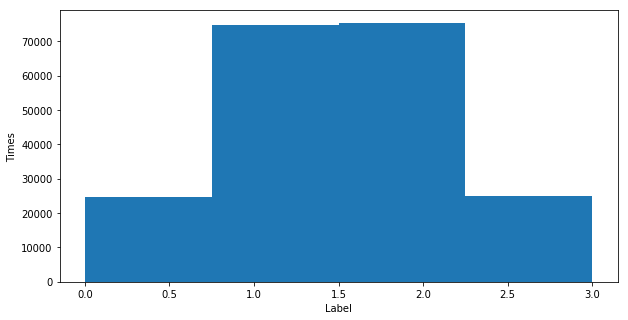

In [121]:
plt.figure(figsize=(10,5))
plt.hist(bs, bins=4)
plt.xlabel("Label")
plt.ylabel("Times")
plt.show()

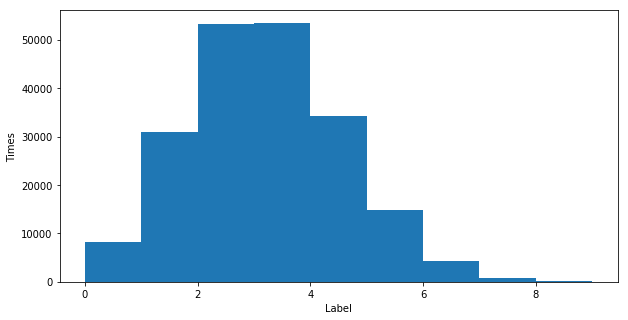

In [122]:
plt.figure(figsize=(10,5))
plt.hist(bs2, bins=9)
plt.xlabel("Label")
plt.ylabel("Times")
plt.show()

## Percent mass function (PMF)

機率質量函數：在離散數值取得特定數值的質量密度(機率)

可以透過 np.unique 取得的出現次數，當作機率

若是連續型的資料：則會使用 機率密度函數 (PDF)

In [168]:
label, counts = np.unique(bs, return_counts=True)
# Numpy 可以對整個陣列同時運算
counts_prob = counts / time 


print("機率各為：", counts_prob)

[0 1 2 3]
機率各為： [0.124125 0.374245 0.376775 0.124855]


呈現方法就不像是直接帶入到 Hist 裡了

分為兩步驟

1. 利用 plot 產生標籤和機率對應的點
2. 利用 vlines 產生該點到 0 的垂直線(美觀)

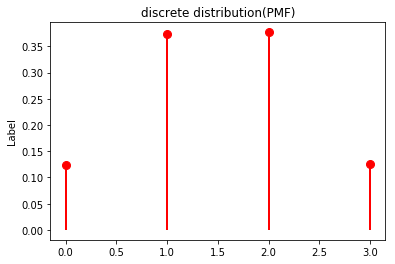

In [175]:
plt.plot(label, counts_prob, 'ro', ms=8, mec='r')
plt.vlines(label, 0 , counts_prob, colors='r', linestyles='-', lw=2)
plt.title('discrete distribution(PMF)')
plt.ylabel('Probability')
plt.ylabel('Label')
plt.show()

## Cumulative distribution function (CDF)

累積分布函數：機率密度函數(PDF)的積分

在類別資料來說，就是把每個機率加起來，就是累積分布了

In [157]:
label, counts = np.unique(bs, return_counts=True)
# Numpy 可以對整個陣列同時運算
counts_prob = counts / time 

print("累加機率各為：", np.cumsum(counts_prob))

累加機率各為： [0.124125 0.49837  0.875145 1.      ]


累積分布就能利用 hist 增加參數 density=True 和 cumulative=True

就能夠畫出

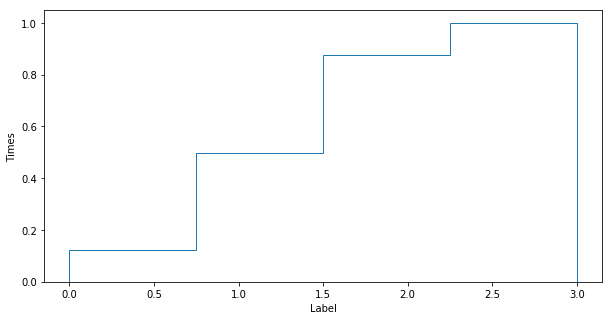

In [177]:
plt.figure(figsize=(10,5))
plt.hist(bs, bins=4, density=True, histtype='step' , cumulative=True)
plt.xlabel("Label")
plt.ylabel("Times")
plt.show()
